**Table of contents**

* [Probability Theory](#probability-theory)
    * [Sample spaces and events](#sample-spaces-and-events)
    * [Probability measure](#probability-measure) 
    * [Joint probability, conditional probability, and independence](#joint-conditional-independence)
    * [Random variable](#random-variable)
    * [Probability distribution](#probability-distribution)
* [Important Distributions](#important-distributions)
    * [Uniform distribution](#uniform)
    * [Bernoulli distribution](#bernoulli)
    * [Categorical distribution](#categorical)
* [Representation and Maximum Likelihood Estimation](#representation)
    
    
**Table of Exercises**

* [Exercise 2-1](#ex2-1) (-/1)
* [Exercise 2-2](#ex2-2) (-/3)
* [Exercise 2-3](#ex2-3) (-/3)
* [Exercise 2-4](#ex2-4) (-/1)
* [Exercise 2-5](#ex2-5) (-/1)
* [Exercise 2-6](#ex2-6) (-/1)
* [Exercise 2-7](#ex2-7) (-/1)
* [Exercise 2-8](#ex2-8) (-/1)
* [Exercise 2-9](#ex2-9) (-/3)
* [Exercise 2-10](#ex2-10) (-/8)


**General notes**

After completing this lab you should be able to 

* implement discrete probability distributions and estimate their parameters via maximum likelihood estimation
* read and write mathematical notation

Guidelines for notation

* In this notebook you are expected to use $\LaTeX$ for typesetting mathematical expressions, if you are not familiar with it check our own examples, they illustrate all commands you will need. If you need additional documentation try searching for it on Google, lots of people contribute answer to latex-related questions. A good starting point is [LaTeX/Mathematics](https://en.wikibooks.org/wiki/LaTeX/Mathematics) and for [equations](https://www.codecogs.com/latex/eqneditor.php).
* I am very picky with notation, so make an effor to respect conventions and to typeset clear unambiguous mathematical expressions. For example, if I use $\mathbb P$ to denote a measure, there is a reason for it, thus make sure to use `\mathbb P` or you will not get the correct type of font. 

# <a name="probability-theory"> Probability Theory

Here we provide a very *lightweight*, and rather *informal*, review of some concepts from probability theory and statistical estimation that are relevant to this course. For a more complete take on probability theory, and with a *proper formal treatment*, check this [excellent course](https://github.com/BasicProbability) out.

Probability refers to a *subjective degree of confidence* (or *belief*) that an event of a certain nature will occur. For example, a weather report might say that there is a low probability of rain in the afternoon. In other words, the event of raining *might occur*. Probability theory deals with the formal foundations of how uncertainty can be quantified. 




## <a name="sample-spaces-and-events"> Sample spaces and events

Probability theory is about assigning probability values to elements of a **sample space**. 

We use $\Omega$ to denote the space, and $\omega \in \Omega$ to denote members of that space. Members are usually  called **outcomes** or **samples**. 

Example of sample spaces:

* in a toss coin the coin can land showing `heads` (H) or `tails` (T), thus $\Omega = \{H, T\}$;
* throwing a 6-sided die can yield an integer from 1 (included) to 6 (included), thus $\Omega = \{1,2,3,4,5,6\}$
* throwing a [10-sided die](https://en.wikipedia.org/wiki/Pentagonal_trapezohedron) followed by a 6-sided die yields pairs of numbers where the first number ranges from 1 (included) to 10 (included) and the second number ranges from 1 to 6, thus $\Omega = \{1, 2, 3, 4, 5, 6, 7, 8, 10\} \times \{1, 2, 3, 4, 5, 6\}$
    * note that here we used a shortcut, the [cartesian product](https://en.wikipedia.org/wiki/Cartesian_product) denoted by $\times$
    * it's okay to use it, just keep in mind what it means: the cartesian product above is the set $\{(1, 2), (1, 3), (1, 4), (1, 4), (1, 6), (2, 1), \ldots, (10, 1), (10, 2), (10, 3), (10, 4), (10, 5), (10, 6) \}$



<a name="ex2-1" style="color:red">**Exercise 2-1**</a> **[1 point]** What is the sample space associated with the [standard 52-playincard deck](https://en.wikipedia.org/wiki/Standard_52-card_deck)? Use $\clubsuit, \diamondsuit, \heartsuit, \spadesuit$ for the suits.



---

In a sample spaces we enumerate individual outcomes of some random experiment. However, we often care more about properties of these outcomes rather than the outcomes themselves. For example, we may be interested in whether the outcome of a die roll is an even number. We call that an **event**, where an event is any subset of the sample space. That is, if we use $A$ to denote the event, then $A \subseteq \Omega$.

Example of events:

* toss a coin and get heads: $\{H\}$;
* roll a die and get 1: $\{1\}$;
* roll a die and get an even number: $\{2, 4, 6\}$;
* roll a die and get an even number bigger than 2: $\{4, 6\}$;

<a name="ex2-2" style="color:red">**Exercise 2-2**</a> **[3 points]** Represent the following events for the 52-card sample space of [Exercise 2-1](#ex2-1)?

1. pick an `A` of $\diamondsuit$:
2. pick an `A`:
3. pick a $\diamondsuit$:




---

We can now define the notion of **event space**. There are some formal properties that event spaces must hold, we will not discuss them here. Instead we will always just assume that for a given sample space $\Omega$, a convenient event space $\mathcal A$ always exists. That 'convenient' event space typically is the *powerset* of the sample space, denoted $\mathcal P(\Omega)$. The [powerset](https://en.wikipedia.org/wiki/Power_set) of $\Omega$ is the set of all subsets of $\Omega$, which therefore includes the emptyset $\emptyset$ and $\Omega$ itself. 


## <a name="probability-measure"> Probability measure

In mathematics, a *measure* is a function that maps elements from a set of sets (such as events in a event space) to real numbers and for which some formal properties hold. We will not survey measure theory, but we will pay particular attention to one important measure, namely, the **probability measure**.

Let $(\Omega, \mathcal A)$ denote a sample space and an event space, and let $A \in \mathcal A$ denote an event, then a probability measure $\mathbb P: \mathcal A \rightarrow \mathbb R$ takes elements in the event space and maps them to a real number (a *probability value*) and is such that:

\begin{align}
(1) \quad\quad &  \mathbb P(A) \ge 0  \text{ for all } $A \in \mathcal A & \\
(2) \quad\quad & \mathbb P \left( \bigcup_{i=1}^k = \sum_{i=1}^k \mathbb P(A_i) \right) & \text{for disjoint events } A_1, A_2, \ldots, A_k \\
(3) \quad\quad & \mathbb P(\Omega) = 1 & 
\end{align}

Let's digest this. 
* Property (1) means that the smallest probability value atainable by any event is 0. 
* Property (2) means that the total probability assigned to $k$ [disjoint events](https://en.wikipedia.org/wiki/Disjoint_sets) is the sum of the probability values assigned to each of the $k$ events independently. 
* And finally, property (3) means that if we consider the event which is the set of all possible outcomes, we have a total probability value of 1. 



Let's diggest this some more, this time with an example. Suppose we are throwing a dice. The sample space is $\Omega = \{1, 2, 3, 4, 5, 6\}$. There are many events we can be interested in, for example:

* `getting 1` represented by the set $\{1\}$;
* `getting 2` represented by the set $\{2\}$;
* `getting either 1 or 2` represented by the set $\{1, 2\}$
* `getting an odd number` represented by the set $\{1, 3, 5\}$
* `getting more than 2` represented by the set $\{3, 4, 5, 6\}$
* `getting whatever` represented by the set $\{1, 2, 3, 4, 5, 6\}$ (note that this is exactly equivalent to the complete sample space $\Omega$)

There are so many things about this sample space that we may be interested in, that we just assume we may potentially be interested in any event in $\mathcal P(\Omega)$.

* Property (1) implies that the smaller probability value assigned to any single event in the event space is 0.
* Property (2) implies that if we take disjoint events such as $\{1\}$ (`getting 1`) and $\{2\}$ (`getting 2`), the total probability value assigned to the union is the sum of probability values, that is, $\mathbb P(\{1, 2\}) = \mathbb P(\{1\}) + \mathbb P(\{2\})$.
* Property (3) implies that the event $\Omega$ (`whatever`) has probability 1. This is the famous informal rule that says *probabilities must add up to 1*.



It may not look obvious at first, but from properties 1 to 3 we can conclude that:

\begin{align}
(4) \quad\quad & \mathbb P(\emptyset) = 0 & \\
(5) \quad\quad & \mathbb P(A \cup B) = \mathbb P(A) + \mathbb P(B) - \mathbb P(A \cap B) & \text{for events } A, B \in \mathcal A\\
(6) \quad\quad & \mathbb P(\Omega \setminus A) = 1 - \mathbb P(A) & \text{for an event } A \in \mathcal A
\end{align}

Let's digest these ones now. 

* Property (4) states that the *empty event* has 0 probability: this is to say that if we observe a random experiment something will happen (there is no chance that nothing will happen).
* Property (5) is a generalisation of property (2) which does not require *disjoint* events. Also, it generalises trivially to more than 2 events. 
* Property (6) is also called the *complement rule*. For example, the probability of `not getting 2` is $\mathbb P(\{1, 3, 4, 5, 6\})$ which is the same as 1 minus the probability of `getting 2`, that is, $1 - \mathbb P(\{2\})$.


We now define the concept of a **probability space**. A probability space is a triple $(\Omega, \mathcal A, \mathbb P)$ consisting of a sample space $\Omega$, an event space $\mathcal A$, and a probability measure $\mathbb P$.

<a name="ex2-3" style="color:red">**Exercise 2-3**</a> **[3 points]** For the probability space $(\Omega, \mathcal P(\Omega), \mathbb P)$ where $\Omega$ is the sample space of Exercise 2-1 (52-card deck), give an expression for the probability of picking a card that complies with the following cases (use the complement rule whenever possible and make sure you provide representations for every event present in the expression):

1. Not an `A`:
2. Not a $\heartsuit$:
3. Neither an `A` nor a $\heartsuit$:






---

## <a name="joint-conditional-independence"> Joint probability, conditional probability, and independence 

An important concept is that of **joint probability**, which concerns the probability of the intersection of events. We denote joint probability between two events $A, B$ by $\mathbb P(A \cap B)$ or equivalently $\mathbb P(A, B)$ --- where the order of enumeration is arbitrary.

We can find the joint probability by using the elementary properties above involving union and complements. For that we will need [De Morgan's law](https://en.wikipedia.org/wiki/De_Morgan's_laws).



<a name="ex2-4" style="color:red">**Exercise 2-4**</a> **[1 point]** Give an expression for the joint probability $\mathbb P(A \cap B)$ in terms of union and complements by applying De Morgan's law. You may use one or more of the properties (1) to (6).






---

Joint probability help us define the concept of **conditional probability**. The probability of an event $A$ conditioned on event $B$ having happened with $\mathbb P(B) > 0$ is defined as: 

\begin{equation}
    (7) \quad\quad \mathbb P(A|B) = \frac{\mathbb P(A \cap B)}{\mathbb P(B)}
\end{equation}

The interpretation of conditional probabilities is that they are the probabilities of events assuming that another event has already occurred.

If two events $A$ and $B$ are disjoint, then $A \cap B = \emptyset$. Disjoint events are said to be **independent** events, denoted by $A \perp B$. For independent events it holds that:

\begin{equation}
    (8) \quad\quad \mathbb P(A | B) = \mathbb P(A)
\end{equation}

With (7) and (8) we conclude that for *independent* events:

\begin{equation}
    (9) \quad\quad \mathbb P(A \cap B) = \mathbb P(A) \times \mathbb P(B)
\end{equation}


<a name="ex2-5" style="color:red">**Exercise 2-5**</a> **[1 point]** Prove property (9) using property (7) and (8).





---

## <a name="random-variable"> Random variable

In general, we perform random experiments to investigate particular properties of outcomes. 
We will consider an example from [Schulz and Schaffner (2016)](https://github.com/BasicProbability):


> Like most people living in the north of Europe, your choice of clothing probably depends strongly on the weather. Let us assume that you have a thick winter jacket that you put on when it is cold, a light soft-shell jacket that you wear when temperatures are mild and that you simply wear a T-shirt or a sweater when it is warm. Let us also assume that the forecasting site you consult every morning reports the temperatures up to one decimal. The question is: does it matter to you whether it is 5.4 or 7.3 degrees centigrade outside when you make your decision about what to wear? Most likely you are only interested in whether it is cold, mild or warm. This may obviously vary according to your own perception of warmth and cold. Here we will assume that it is cold whenever the temperature is below 10 degrees, mild between 10 and 20 degrees (inclusive) and warm whenever the temperature rises above 20 degrees. So what you are really interested in, at least as far as clothing is concerned, is whether the temperature $t$ is $t < 10$ or $10 \le t \le 20$ or $t > 20$. What we are looking for is a way of transforming outcomes from the temperature scale into judgements of perceived temperature.


A **random variable** $X$ on a probability space $(\Omega, \mathcal A, \mathbb P)$ is a function $X: \Omega \rightarrow \mathbb R$ that maps elements in the *sample space* to real numbers. Moreover we require that:

(10) for all $r \in \mathbb R$, the set $A = \{\omega ~ |~ X(\omega) \leq r\}$ is in the *event space* $\mathcal A$
* we read (10) as: $A$ is the set of all outcomes $\omega \in \Omega$ which the function $X$ maps to a real number less or equal to $r$; and $A$ belongs to the event space, thus $A$ is an event;
* the sample space is the *domain* of the random variable
* the real line is the *co-domain* of the random variable 
* it's sometimes convenient to refer directly to the assignments that a random variable may take on, that is, the particular subset of real values that the random variable maps outcomes to (the *image* of the function). We call that set the random variable's **support** and we denote it by a caligraphic version of the letter used to denote the random variable itself. That is, we usually say:
> a random variable $X$ takes on values in the set $\mathcal X$

By convention, we denote random variables with capital Roman letters such as $X$, $Y$, or $Z$.


Example: let's define a random variable $X$ for the weather situation where temperature values $t$ are elements of our sample space.

\begin{equation}
    X(t) = 
    \begin{cases} 
      1 & t < 10 \\
      2 & 10 \le t \le 20 \\
      3 & t > 20
    \end{cases}
\end{equation}

Note that even though the underlying sample space is not discrete, the random variable itself is because it buckets temperature values in 3 intervals. In other words its image is the finite set $\mathcal X = \{1, 2, 3\}$. Also, note that we did not have to explicitly define a sample space, neither an event space (random variables are very handy!). 

**Assignment**: whenever a random variable $X$ takes on a particular value, we write $X=x$ using the corresponding lowercase letter as a generic value. This notation hides a lot of details, so let's look into it closely:
* when we write an assignment $X=x$, we implicitly refer to the event $A = \{\omega ~| ~ X(\omega) = x\}$. Of course, all that respecting the conditions in (10), that is,  $\omega \in \Omega$ and $A \in \mathcal A$


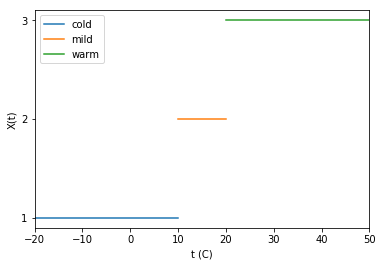

In [1]:
# Let us visualise the random variable X of the temperature example
#  since RVs are functions, we can plot them
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot([-20, 9.99], [1, 1])
plt.plot([10, 20], [2, 2])
plt.plot([20.01, 50], [3, 3])
plt.yticks([1, 2, 3], [1, 2, 3])
plt.xlim(-20,50)
plt.ylabel('X(t)')
plt.xlabel('t (C)')
_ = plt.legend(['cold', 'mild', 'warm'])

<a name="ex2-6" style="color:red">**Exercise 2-6**</a> **[1 point]** Define a random variable that models the number of heads when we toss two coins. Hint: in this case start by defining a sample space. 




---

It is in general the case that for a random variable of interest there are multiple equivalent ways to define it, starting from the fact that it all depends on how we define the sample space. That's why sometime it's easier to define the random variable directly and leave the sample space *implicitly defined*. 

Note that so far we have discussed random variables that can take on discrete values, i.e. one out of $k$ possibilities, where $k$ is some finite number. We call these **discrete random variables**.


## <a name="probability-distribution"> Probability distribution

The **discrete probability distribution** of a random variable $X$ is denoted by $P_X$ and is defined as the function

\begin{equation}
    (11) \quad\quad P_X(X=x) \triangleq \mathbb P(\{\omega ~ | ~ X(\omega) = x\})
\end{equation}

It is not at all unusual to drop one or both mentions to $X$, thus denoting the probability value by $P_X(x)$, $P(X=x)$, or $P(x)$. We do that whenever there is no risk of ambiguity.

We call **probability mass function** (or *pmf*) the function
\begin{equation}
    f(a) = P_X(X=a)
\end{equation}
it simply returns the probability value of associated with $X=a$. 


<a name="ex2-7" style="color:red">**Exercise 2-7**</a> **[1 point]** If a discrete random variable $X$ takes on values in the set $\mathcal X$, what's the result of the expression below and why?

* $\sum_{x \in \mathcal X} P_X(X=x)$





---

The **cumulative distribution function** (or *cdf*) is used when we are interested in assessing the probability of a range of values.

The cdf of a distribution $P_X$ of the random variable $X$ is the function

\begin{align}
F(a) &\triangleq P(X \le a) \\
       &=  \sum_{x \le a} P_X(x)
\end{align}

it returns the cumulative probability over the interval $(-\infty, a]$.

Note that it is trivial then to obtain the probability of $X$ falling in the interval $[a, b]$, we just compute $F(b) - F(a)$ for $b \ge a$.

# <a name="important-distributions"> Important Distributions

Now we will illustrate some instances of discrete probability distributions

## <a name="uniform"> Uniform distribution

The [Uniform distribution](https://en.wikipedia.org/wiki/Discrete_uniform_distribution) defined over $k$ outcomes is such that every outcome has the same probability. Because property (3) must always hold, it's obvious to see that each outcome has to have probability $\frac{1}{k}$. We declare Uniform random variables as follows:

\begin{equation}
    X \sim \text{Uniform}(k)
\end{equation}

This is the math equivalent to: $X$ follows a **Uniform distribution** with **parameter** $k$ (number of outcomes)
* a uniform random variable takes on values in the set $\{1, ..., k\}$
* we call $k$ a *parameter* of the distribution because it helps specify it
* we immediately know that $P(x) = \frac{1}{k}$ for $x \in \{1, ..., k\}$
* it's not difficult to generalise the uniform distribution to take on values in any finite discrete interval $\{a, a + 1, \ldots, a + k\}$

Here is a visualisation of a uniform distribution over $k=5$ possible outcomes.

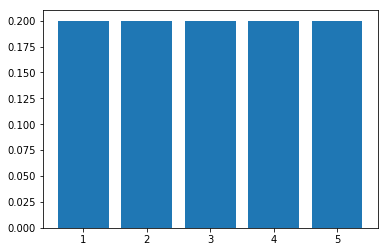

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
k = 5
_ = plt.bar(np.arange(1, k + 1), np.ones(k) / k)

## <a name="bernoulli"> Bernoulli distribution

The [Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution) is defined over exactly 2 outcomes (a *binary* event). By convention we say that the outcome is either 1 (*True* or *positive class*) or 0 (*False* or *negative class*). We fully specify the Bernoulli distribution by specifying the probability of the positive class. Then by the complement rule (6) we know that $P_X(0) = 1 - P_X(1)$. We declare Bernoulli random variables as follows:

\begin{equation}
    X \sim \text{Bernoulli}(p)
\end{equation}

This is the math equivalent to: $X$ follows a **Bernoulli distribution** with **parameter** $p$
* a Bernoulli variable takes on values in the set $\{0, 1\}$
* we call the probability of the positive class a *parameter* of the distribution because it helps specify it
* the Bernoulli parameter is the probability of the positive class, and therefore, $0 \le p \le 1$ for it to be a valid distribution
* we immediately know that $P_X(1) = p$ and $P_X(0) = 1 - p$

Suppose a Bernoulli whose positive class probability is 0.7.

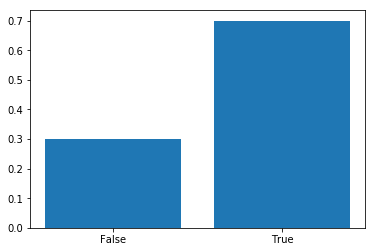

In [3]:
p1 = 0.7
plt.bar([0, 1], [1 - p1, p1])
_ = plt.xticks([0, 1], ['False', 'True'])

## <a name="categorical"> Categorical distribution

The [Categorical distribution](https://en.wikipedia.org/wiki/Categorical_distribution) defined over $k$ values can be used to represent the distribution of any discrete  random variable whose sample space is finite.  We declare  categorical random variables as follows:

\begin{equation}
    X \sim \text{Categorical}(\theta_1, \ldots, \theta_k)
\end{equation}

This is the math equivalent to: $X$ follows a **Categorical distribution** with **parameters** $\langle \theta_1, \ldots, \theta_k \rangle$
* a Categorical variable takes on values in the finite set $\{1, \ldots, k\}$;
* we call the parameters of the categorical distribution *class probabilities*, these are probabilities associated with each outcome and they help us specify the distribution;
* we sometimes abreviate the parameters $\langle \theta_1, \ldots, \theta_k \rangle$ into $\pmb \theta$ which we call a *parameter vector* (often we drop the word *vector* and call it simply a *parameter*);
* this $k$-dimensional vector $\pmb \theta$ is no ordinary vector, each one of its $k$ values must be a probability value and therefore $0 \le \theta_x \le 1$ for every assignment $x \in \{1, \ldots, k\}$; moreover, to make a valid distribution, they must also obey $\sum_{x=1}^k \theta_x = 1$; a parameter vector that complies with such conditions is also called a *probability vector*;
* we immediately know that $P_X(x) = \theta_x$.


Let's illustrate this with an example. Suppose we have a bag with 10 marbles where 3 of them are blue, 2 of them are red, and 5 of them are white. Then the probability that the first ball drawn at random is:
* blue is 3/10 or 0.3
* red is 2/10 or 0.2
* white is 5/10 or 0.5
We can design a random variable that models the color of the first ball drawn at random from the bag:

\begin{equation}
    X(\omega) = 
    \begin{cases} 
      1 & \omega = \text{blue} \\
      2 & \omega = \text{red}\\
      3 & \omega = \text{white}
    \end{cases}
\end{equation}

where we arbitrarily decided to map from colors to numbers in lexicographic order (note that we have to realise this mapping because the random variable assignments should be integers from 1 to $k$ with $k=3$ in this case).

In [4]:
# This our sample space: we use a list (rather than a set) because we want it sorted
sample_space = ['blue', 'red', 'white']
# These are the values our random variable takes on 
rv_values = [1, 2, 3]
# This is the mapping from sample space (colours) to numbers (assignments of X)
rv_mapping = dict(zip(sample_space, rv_values))  # realises the mapping above
# And these are the probabilities associated with each colour in the example
probabilities = [0.3, 0.2, 0.5] 

In [5]:
# Let's visualise what we accomplished
print('Sample space:', sample_space)
print('Mapping function:', rv_mapping)
for omega in sample_space:
    x = rv_mapping[omega]
    theta_x = probabilities[x - 1]  # we subtract 1 because random access to lists in Python is 0-based
    print(" outcome %r mapped to %d has probability %.2f" % (omega, x, theta_x))      

Sample space: ['blue', 'red', 'white']
Mapping function: {'blue': 1, 'red': 2, 'white': 3}
 outcome 'blue' mapped to 1 has probability 0.30
 outcome 'red' mapped to 2 has probability 0.20
 outcome 'white' mapped to 3 has probability 0.50


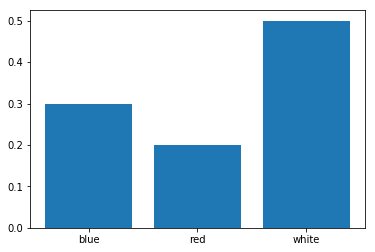

In [6]:
# We can also plot our probability distribution, it's simply a bar plot
#  each bar represents the probability of one of the classes
plt.bar(rv_values, probabilities)
# and we can label the ticks of the x-axis with the classes (colours) rather than the assignments (integers)
_ = plt.xticks(rv_values, sample_space)

## Rules of probability

> From now on we will be a bit less formal about the whole sample space, event space, probability measure thing. We will specify our random variables by describing the sample space somewhat informally and we will assume an appropriate mapping exists. The point is that from now on we want to focus on manipulating probability distributions.

A very important result of probability theory is called the **chain rule**

\begin{equation}
(12) \quad\quad P(x, y) = P(x)P(y|x)
\end{equation}

this rule relates the probability of the *joint assignment* $x$ and $y$ (left hand-side) to the *marginal* probability of $x$ (first term on the right-hand side), and the *conditional* probability of $y$ given $x$ (second probability on the rigth-hand side). 

This rule can be generalised to $n \ge 2$ events and the particular order in which we enumerate them is arbitrary (the result does not depend on the order).

\begin{equation}
(13) \quad\quad P(\alpha_1, \ldots, \alpha_n) = P(\alpha_1)\prod_{i = 2}^n P(\alpha_i|\alpha_1, \ldots, \alpha_{i-1})
\end{equation}


For a joint distribution over $X$ and $Y$, the **marginal probability** of an assignment $X=x$ is the result of considering the total probability associated with $X=x$ regardless of the assignment to $Y$:

\begin{equation}
(14) \quad\quad P(X=x) = \sum_{y} P(X=x, Y=y)
\end{equation}

where the sum is over all values in the image of the random variable $Y$. 


Finally, another important rule shows us how to invert a conditional probability distribution, this is called the **Bayes rule**:

\begin{equation}
(15) \quad\quad P(X=x|Y=y) = \frac{P(Y=y|X=x)P(X=x)}{P(Y=y)}
\end{equation}

This follows trivially from the definition of conditional probability and the chain rule. 


The next important concept to discuss is that of a random variable. 



<a name="ex2-8" style="color:red">**Exercise 2-8**</a> **[1 point]** Prove the *Bayes rule*






---

# <a name="representation"> Representation and Maximum Likelihood Estimation


We can represent random variables in a computer by representing their distribution. Then we can *simulate/sample* values from that distribution. Here you will learn how to represent a Bernoulli variable and a Categorical variable as well as how to simulate them. 

Recall that a Bernoulli variables takes exactly 1 parameter to represent, whereas a Categorical over $k$ possible events, takes exactly $k$ values. 


**Bernoulli**: we will represent a bernoully variable by storing its Bernoulli parameter (a number between 0 and 1). 


In [7]:
import numpy as np

class Bernoulli:
    
    def __init__(self, p):
        """
            X ~ Bernoulli(p)
            where p is the probability of the positive class
        """
        if not (0 <= p <= 1):
            raise ValueError('The Bernoulli parameter must be a probability')
        self.p = p
        
    def sample(self):
        """Returns either 1 or 0 depending on a random simulation"""
        # We rely on numpy's pseudo random number generator to obtain a number uniformly distributed
        # between 0 and 1
        u = np.random.uniform()
        # The idea is to now transform this uniform simulation is such a way that with probability p
        #  we get 1 and with probability (1-p) we get a 0
        # For example, imagine p = 0.7 then we want to return 1 on average 70% of the times this 
        #  code is executed. 
        # Since `u` was uniformly generated, it did not bias any particular segment of the interval 
        #  between 0 and 1. Therefore if we take the first 70% of that interval to return 1, we 
        #  simulate the variable correctly. 70% of the interval between 0 and 1 can for example be represented
        #  by the interval between 0 and 0.7 (the p parameter) 
        return 1 if u < self.p else 0
    
    def sample_n(self, N):
        """Returns an array of N samples"""
        return np.array([self.sample() for _ in range(N)])
    
    def pmf(self, value):
        """
        Probability mass function
        value: an assignment of X
        returns: probability value for X=value
        """
        if value == 1:
            return self.p
        elif value == 0:
            return 1. - self.p
        else:
            raise ValueError('Bernoully variables can only take on 1 or 0')
            
    def cdf(self, a):
        """
        Cumulative probability function
            F_X(a) = \sum_{x <= a} P(X=x)
        a: an assignment of X
        returns: total probability over the interval [-inf, a]
        """
        if a == 0:
            return 1. - self.p
        elif a == 1:
            return 1.
        else:
            raise ValueError('Bernoully variables can only take on 0 or 1')
            
    def __repr__(self):
        return 'Bernoulli(%s)' % self.p


Now we can declare a Bernoulli random variable 

In [8]:
X = Bernoulli(0.7)
print('X ~', X)
for x in range(2):
    print(' P(X=%d) = %.2f F_X(%d) = %.2f' % (x, X.pmf(x), x, X.cdf(x)))

X ~ Bernoulli(0.7)
 P(X=0) = 0.30 F_X(0) = 0.30
 P(X=1) = 0.70 F_X(1) = 1.00


Note that an rv does not give you a value (as normal variables in programming languages would), rvs give you a distribution from which you can sample an assignment.

In [9]:
for i in range(10):
    x = X.sample()
    print('assignment {} with probability {:.2f}'.format(x, X.pmf(x)) )

assignment 0 with probability 0.30
assignment 1 with probability 0.70
assignment 1 with probability 0.70
assignment 1 with probability 0.70
assignment 1 with probability 0.70
assignment 1 with probability 0.70
assignment 1 with probability 0.70
assignment 0 with probability 0.30
assignment 0 with probability 0.30
assignment 1 with probability 0.70


We can answer some interesting questions about the distribution of a random variable once we get some dataset of observations. 
So let's get a dataset of `N=1000` Bernoulli variables:

In [10]:
N = 1000
bernoulli_observations = X.sample_n(N)

We can easily plot our samples to get an idea of what we obtained:

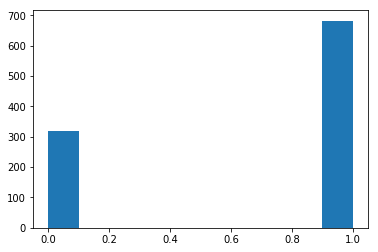

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
_ = plt.hist(bernoulli_observations)

It turns out the **maximum likelihood estimate** of the Bernoulli parameter is nothing but the ratio in which we observe $X=1$. We can do that rather easily simply by counting the number of 1s and dividing by the total size of the dataset. 


In [12]:
def bernoulli_mle(observations):
    # this is the number of observations we have
    N = len(observations)
    count1 = observations.sum()
    return float(count1) / N

Now if we pretend we do not actually know the Bernoulli parameter, but we have Bernoulli observations, then we can derive a **parameter estimate** that is an educated guess as to what the underlying data generating process actually was.

In [13]:
bernoulli_mle(bernoulli_observations)

0.682

Note that we get something that's quite close to 0.7.

That is only the case because we have enough observations. For example, consider estimating the Bernoulli parameter for few examples (as few as `N=10`), you will notice that your estimates are not going to always look good. 

In [14]:
nb_repetitions = 5
for i in range(nb_repetitions):
    print('Attempt number {}: {}'.format(i, bernoulli_mle(X.sample_n(10))))

Attempt number 0: 1.0
Attempt number 1: 0.8
Attempt number 2: 0.8
Attempt number 3: 0.7
Attempt number 4: 0.6


<a name="ex2-9" style="color:red">**Exercise 2-9**</a> **[3 points]** Compare maximum likelihood estimation for a Bernoulli variable using 1, 10, 100, and 1000 samples. In order to gather enough data, repeat each experiment 100 times. Summarise the results of your investigation using a [boxplot](https://en.wikipedia.org/wiki/Box_plot) for each sample size and provide a discussion on which aspects seem to improve as the sample size grows.

Your plot should look like this (give or take some small variance):
![Reference for Ex2-9](ex2-9-plot.png)





---

<a name="ex2-10" style="color:red">**Exercise 2-10**</a> **[10 points]** Now you should extend the Bernoulli case to deal with Categorical random variables, that is 

1. complete the skeleton class below (2 points in total)
    * note this requires completing the sampling procedure (1 point)
2. implement the maximum likelihood estimation algorithm (2 points)

Also keep in mind that your class is expected to make sure the parameters are *valid* (recall the conditions associated with categorical parameter vectors). 

To test your representation (1 point):

* print the pmf and cdf values for all values the rv can take on (as we did for the Bernoulli example)

To test your MLE procedure (3 points): 

* compute a maximum likelihood estimate using N samples from a Categorical distribution with parameters $[0.1, 0.2, 0.7]$ 
    * repeat this procedure 1000 times to get the average estimate as well as error estimates: you can get average and error using `np.mean` and `np.std`
* plot the average estimate and standard deviation using barplots (with `plt.bar`)
    * experiment with N = 1, N = 10, N = 100, and N = 1000
* comment on which aspects seem to improve as sample size grows


This is all very similar to what was done in the Bernoulli case, but here we replace boxplot by barplots because our Categorical distributions has $k=3$ parameters (not just 1)


Hints:

* to simulate a categorical random variable you need to generalise the idea shown to you in the case of Bernoulli variables to K segments (rather than 2 segments); in the Bernoulli case we chopped the $[0,1]$ segment into two, namely, $[0, p)$ and $[p, 1]$. If you are not used to the notation $[a,b)$, it means a continuous interval between $a$ (included) and $b$ (excluded), that is, $a \leq x < b$. Categorical variables defined over K values require K segments chopped like this: $[0, \theta_1)$, $[\theta_1, \theta_1 + \theta_2)$, $[\theta_1 + \theta_2, \theta_1 + \theta_2 + \theta_3)$, and so on till $[\sum_{i=1}^{K-1} \theta_i, 1]$. Note how similar this is to the cdf of the categorical variable. 
* the maximum likelihood estimate of a categorical variable is a vector where each position represents the ratio in which we observe the corresponding value of the random variable, that is `number of time k occurs divided by total number of data points`

Important: an alternative way to simulate a categorical variable (which will not be accepted as an aswer to this particular exercise) is to use `np.random.choice` (check its documentation with `np.random.choice?`). 

Your plot should look like this (give or take some small variance):

![Reference for Ex2-10](ex2-10-plot.png)




In [17]:
# Here we provide you with a sketch that you must complete

class Categorical:
    
    def __init__(self, theta):
        """
            X ~ Categorical(theta_1, ..., theta_K)
            where theta is the parameter vector and theta_k is the probability of the kth class
            recall that theta_k is bound between 0 and 1 and the sum should be exactly 1
        """
        pass
        
    def sample(self):
        """Returns a number from 1 to K representing the sampled value"""
        pass
    
    def sample_n(self, N):
        """Returns a numpy array containing N simulated values"""
        pass
    
    def pmf(self, value):
        """
        Probability mass function evaluated at a certain value
        value: an assignment of X
        """
        pass
    
    def cdf(self, a):
        """
        Cumulative probability function
            F_X(a) = \sum_{x <= a} P(X=x)
        a: an assignment of X
        returns: total probability over the interval [-inf, a]
        """
        pass
            
    def __repr__(self):
        pass
    